# Binary Classification Projects Here

In [1]:
# Importing libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sbn

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split

In [2]:
# Importing the data set

data = pd.read_csv("Telco.csv")

data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
data.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(6531,), dtype=object)

In [5]:
data[data['TotalCharges'].str.strip() == ' ']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [6]:

data['TotalCharges'] = data['TotalCharges'].replace(" ", np.nan)


In [7]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [8]:
data.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [9]:
data['OnlineSecurity'].unique(
)

array(['No', 'Yes', 'No internet service'], dtype=object)

In [10]:
data.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [11]:
data.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [12]:
data.Dependents.unique()

array(['No', 'Yes'], dtype=object)

In [13]:
data.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [14]:
data.gender.unique()

array(['Female', 'Male'], dtype=object)

In [15]:
data.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [16]:
# Encoding the gender and other columns


l_encoder = LabelEncoder()
data['gender'] = l_encoder.fit_transform(data['gender'])
data.gender.unique()

array([0, 1])

In [17]:

data['Partner'] = l_encoder.fit_transform(data['Partner'])
data['Partner'].unique()

array([1, 0])

In [18]:
data['Dependents'] = l_encoder.fit_transform(data['Dependents'])
data.Dependents.unique()

array([0, 1])

In [19]:
data['PhoneService'] = l_encoder.fit_transform(data['PhoneService'])
data.PhoneService.unique()

array([0, 1])

In [20]:
data['InternetService'] = l_encoder.fit_transform(data['InternetService'])

data.InternetService.unique()

array([0, 1, 2])

In [21]:
data.OnlineSecurity = l_encoder.fit_transform(data['OnlineSecurity'])

data.OnlineSecurity.unique()

array([0, 2, 1])

In [22]:
data['StreamingMovies'] = l_encoder.fit_transform(data['StreamingMovies'])

data.StreamingMovies.unique()

array([0, 2, 1])

In [23]:
data['Churn'] = l_encoder.fit_transform(data['Churn'])

data.Churn.unique()

array([0, 1])

In [24]:
data['PaymentMethod'] = l_encoder.fit_transform(data['PaymentMethod'])


data['PaymentMethod'].unique()

array([2, 3, 0, 1])

In [25]:
data['gender'] = l_encoder.fit_transform(data['gender'])

data['gender'].unique()

array([0, 1])

In [26]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

### Feature Selection


In [28]:
x = data[['StreamingMovies', 'OnlineSecurity', 'TotalCharges', 'InternetService', 'PhoneService', 'Dependents' ,'Partner', 'PaymentMethod','gender']]


y = data['Churn']

In [29]:
x.head()

,StreamingMovies,OnlineSecurity,TotalCharges,InternetService,PhoneService,Dependents,Partner,PaymentMethod,gender
0,0,0,29.85,0,0,0,1,2,0
1,0,2,1889.50,0,1,0,0,3,1
2,0,2,108.15,0,1,0,0,3,1
3,0,2,1840.75,0,0,0,0,0,1
4,0,0,151.65,1,1,0,0,2,0


In [30]:
x.tail()

,StreamingMovies,OnlineSecurity,TotalCharges,InternetService,PhoneService,Dependents,Partner,PaymentMethod,gender
7038,2,2,1990.50,0,1,1,1,3,1
7039,2,0,7362.90,1,1,1,1,1,0
7040,0,2,346.45,0,0,1,1,2,0
7041,0,0,306.60,1,1,0,1,3,1
7042,2,2,6844.50,1,1,0,0,0,1


In [31]:
x.isnull().sum()

StreamingMovies     0
OnlineSecurity      0
TotalCharges       11
InternetService     0
PhoneService        0
Dependents          0
Partner             0
PaymentMethod       0
gender              0
dtype: int64

In [32]:
x.describe()

,StreamingMovies,OnlineSecurity,TotalCharges,InternetService,PhoneService,Dependents,Partner,PaymentMethod,gender
count,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.992475,0.790004,2283.300441,0.872923,0.903166,0.299588,0.483033,1.574329,0.504756
std,0.885091,0.859848,2266.771362,0.737796,0.295752,0.458110,0.499748,1.068104,0.500013
min,0.000000,0.000000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,401.450000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1397.475000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000
75%,2.000000,2.000000,3794.737500,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,8684.800000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [33]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [34]:
y.tail()

7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, dtype: int64

In [35]:
y.describe

<bound method NDFrame.describe of 0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64>

### Training and Testing the data


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state= 42)

In [37]:
x_train

,StreamingMovies,OnlineSecurity,TotalCharges,InternetService,PhoneService,Dependents,Partner,PaymentMethod,gender
2142,2,2,1336.80,0,1,1,0,3,0
1623,2,0,5129.45,1,1,0,0,0,0
6074,0,0,23.45,0,0,0,1,2,1
1362,0,0,237.95,1,1,0,0,2,1
6754,0,2,NaN,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
3772,2,2,95.00,1,1,0,1,2,1
5191,2,2,2198.30,0,1,1,1,1,0
5226,1,1,306.05,2,1,1,1,2,1
5390,2,0,1200.15,1,1,0,0,2,1


In [38]:
y_train

2142    0
1623    0
6074    1
1362    1
6754    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 5634, dtype: int64

In [39]:
x_test

,StreamingMovies,OnlineSecurity,TotalCharges,InternetService,PhoneService,Dependents,Partner,PaymentMethod,gender
185,0,0,24.80,0,0,0,1,2,0
2715,1,1,996.45,2,1,0,0,0,1
3825,1,1,1031.70,2,1,1,1,3,0
1807,0,0,76.35,1,1,0,0,2,0
132,0,0,3260.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
6366,2,0,4378.80,0,1,0,1,3,0
315,2,2,5686.40,1,1,1,1,1,1
2439,1,1,329.75,2,1,1,1,0,1
5002,2,2,2960.10,0,0,1,1,1,0


In [40]:
y_test

185     1
2715    0
3825    0
1807    1
132     0
       ..
6366    0
315     0
2439    0
5002    0
1161    1
Name: Churn, Length: 1409, dtype: int64

In [41]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # or 'mean'
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)


### Scaling the values


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_imputed = sc.fit_transform(x_train_imputed)
x_train_imputed

x_test_imputed = sc.transform(x_test_imputed)

### Fitting the Support Vector Classifier Model

In [43]:
svr_model = SVC(kernel='rbf')

svr_model.fit(x_train_imputed, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Fitting the Random Forest Model


In [44]:
r_model = RandomForestClassifier()

r_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Fitting the Decision Tree model

In [45]:
d_model = DecisionTreeClassifier()

d_model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Fitting the Logistic model


In [46]:
l_model = LogisticRegression(max_iter = 100)

l_model.fit(x_train_imputed, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Prediction of Random Forest Model

In [47]:
r_pred = r_model.predict(x_test)

r_pred

array([1, 0, 0, ..., 0, 0, 0], shape=(1409,))

### Prediction of Decision Tree Model

In [48]:
d_pred = d_model.predict(x_test)

d_pred

array([1, 0, 0, ..., 0, 0, 0], shape=(1409,))

### Prediction of Logisitcs Regression

In [49]:
l_pred = l_model.predict(x_test_imputed)

l_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1409,))

### Prediction of SVC

In [50]:
svr_pred = svr_model.predict(x_test_imputed)

svr_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1409,))

### Evaluation of SVC

In [51]:
acc = accuracy_score(y_test, svr_pred)

acc

0.8005677785663591

### Evaluation of Random Forest Model

In [52]:
acc = accuracy_score(y_test, r_pred)

acc

0.7430801987224982

### Evaluation of Decision Tree Model

In [53]:
acc = accuracy_score(y_test, d_pred)

acc

0.7381121362668559

In [54]:
conf = confusion_matrix(y_test, d_pred)

conf

array([[856, 180],
       [189, 184]])

### Evaluation of Logistic Model

In [55]:
y_score = l_model.predict_proba(x_test_imputed)[:,1]
y_score

array([0.43438364, 0.19895759, 0.15545325, ..., 0.12868747, 0.05764708,
       0.2848263 ], shape=(1409,))

In [56]:
acc = accuracy_score(y_test, l_pred)

acc

0.7366926898509581

In [57]:
conf  = confusion_matrix(y_test, l_pred)

conf

array([[969,  67],
       [304,  69]])

### Heat MAp

<Axes: >

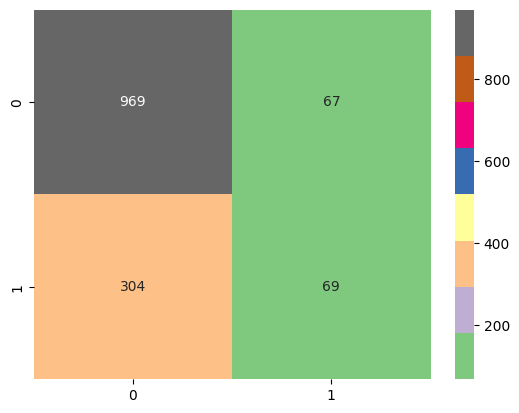

In [67]:
sbn.heatmap(conf , annot=True, fmt="d", cmap='Accent')

### Confusion Matrix

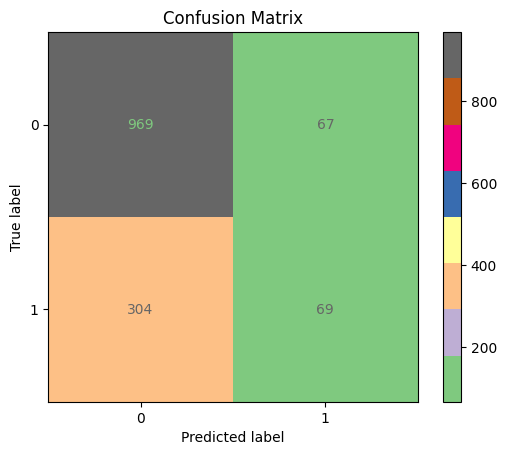

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix = conf)
disp.plot(cmap="Accent")
plt.title("Confusion Matrix")
plt.show()

### ROC Curve and AUC for Logisitic Mode

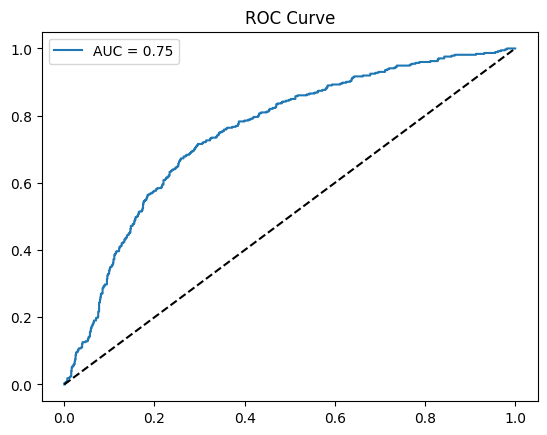

In [59]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _= roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve")
plt.legend()
plt.show()

### Precision - Recall Curve for Logistic Model

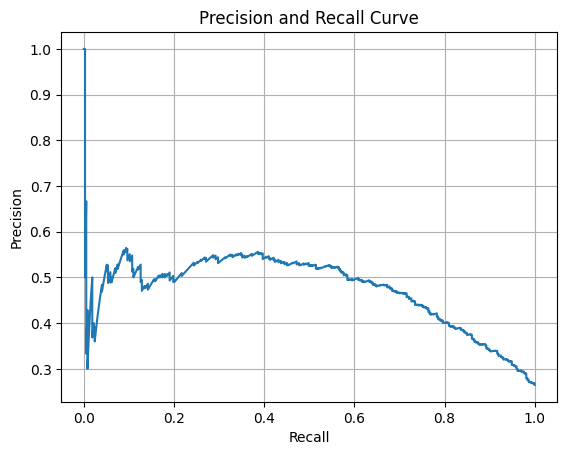

In [60]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.plot(recall, precision)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision and Recall Curve")
plt.grid()
plt.show()

### Decision Tree Classifier Model

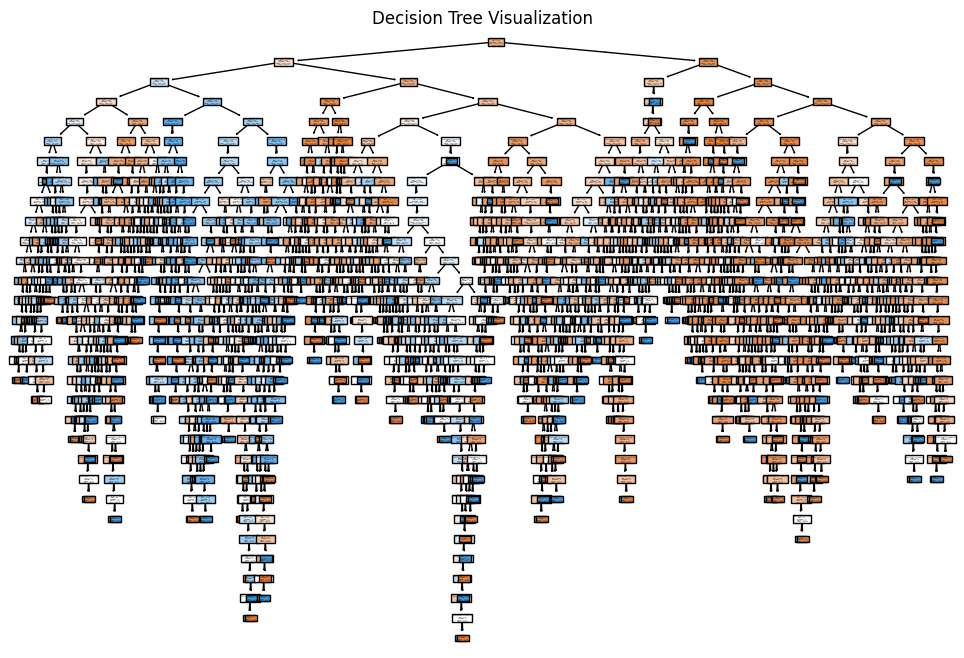

In [61]:
from sklearn.tree import plot_tree

plt.figure(figsize= (12,8))

plot_tree(d_model, feature_names=x.columns, class_names=['Class 0', 'Class 1'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()